Please **submit this Jupyter notebook through Canvas** no later than **Monday November 5 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

**Jordan Earle** (12297127)

**Natasja Wezel** (11027649)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

-----
# Exercise 1
Compute a solution to the equation

$$ 600 x^4 - 550 x^3 + 200 x^2 - 20 x - 1 = 0, \quad x \in [0.1, 1.0], $$

using each of the following methods.

The actual roots are: (-0.04...,0) and (0.23...,0). We can discard (-0.04,0) because the assignement says $x \in [0.1, 1.0]$.

In [3]:
def f(x):
    return 600 * x**4 - 550 * x**3 + 200 * x**2 - 20 * x - 1

def f_derivative(x):
    return 2400 * x**3 - 1650 * x**2 + 400*x - 20

## (a)
Using the interval bisection method.

In [10]:
bisection_list = []

# define interval bisection method
def interval_bisection(a, b, tolerance):
    
    while (b-a > tolerance):
        m = a + (b - a)/2
        bisection_list.append(m)

        if f(a) < 0 and f(m) < 0 or f(a) >= 0 and f(m) >= 0:
            a = m
        else:
            b = m
    return bisection_list

# try interval bisection for this problem
tolerance = 0.00000001
a = 0.1
b = 1.0

root = interval_bisection(a,b,tolerance)
print(root[-1])


0.23235296681523326


## (b)
Using newton's method.

In [11]:
newton_list = []

# define newtons method
def newton(x0):
    
    for k in range(20):
        next_x = x0 - f(x0)/f_derivative(x0)
        x0 = next_x
        newton_list.append(x0)
    return newton_list

# try newtons method for this problem
x0 = 1
root = newton(x0)
print(root[-1])

0.2323529647499171


## (c)
Using the secant method.

In [67]:
# if we iterate further than 9 steps f(xk) = f(xkminus1) (because it converges to the same number)

secant_list = []

xkminus1, xk = 0.1, 1.0

for i in range(1, 10):
    xkplus1 = xk - (f(xk) * (xk - xkminus1))/(f(xk) - f(xkminus1))
    
    xkminus1 = xk
    xk = xkplus1
    secant_list.append(xk)
    
print(xk)

0.23235296474991718


## (d)
Compare the speed of convergence you observe for the three methods. Plot your results and briefly explain.

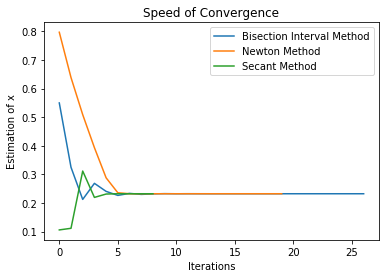

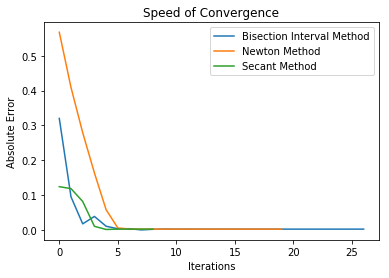

In [68]:
bisection_error = abs(np.array(bisection_list) - .23)
newton_error = abs(np.array(newton_list) - .23)
secant_error = abs(np.array(secant_list) - .23)

plt.figure(0)
plt.plot(range(len(bisection_list)), bisection_list, label="Bisection Interval Method")
plt.plot(range(len(newton_list)), newton_list, label= "Newton Method")
plt.plot(range(len(secant_list)), secant_list, label="Secant Method")#
plt.xlabel('Iterations')
plt.ylabel('Estimation of x')
plt.title('Speed of Convergence')
plt.legend()

plt.figure(1)
plt.plot(range(len(bisection_list)), bisection_error, label="Bisection Interval Method")
plt.plot(range(len(newton_list)), newton_error, label= "Newton Method")
plt.plot(range(len(secant_list)), secant_error, label="Secant Method")#
plt.xlabel('Iterations')
plt.ylabel('Absolute Error')
plt.title('Speed of Convergence')
plt.legend()

From the plots it can be seen that for this problem the secant method converges to the approximation of the root the fastest, though they have all approximatly converged by the 5th itteration.  The initial guesses allow for faster convergence if they are closer to the actual root.

--------
# Exercise 2
Consider the following boundary value problem involving a nonlinear ordinary differential equation:

$$y''(x) + \exp(y(x)) = 0, \quad 0 < x < 1, \quad y(0) = y(1) = 0.$$

We can approximate the solution by discretizing the differential equation and solving the resulting system of nonlinear equations. Suppose we use $n+2$ discretization points for $x$ (denoted $x_k = kh$ for $k \in \{0, \ldots, n+1\}$ and $h = \frac{1}{n+1}$, the approximate solution is denoted $y_k = y(x_k)$.

We will use a _central finite difference_ approximation for the second derivative: 

$$y''(t_k) \approx \frac{y_{k+1} - 2 y_k + y_{k-1}}{h^2}$$

From the boundary values, we conclude that $y_0 = y_{n+1} = 0$. The result is a set of $n$ nonlinear equations

$$ \frac{y_{k+1} + y_{k-1} - 2 y_k}{h^2} + \exp y_k = 0, \quad k = 1, \ldots, n.$$

## (a)
Write this set of equations as $\mathbf{f}(\mathbf x) = \mathbf{0}$, where $\mathbf f$ is a function from $\mathbf x \in \mathbb R^{n}$ to $\mathbf f(\mathbf x) \in \mathbb R^{n}$. What is $\mathbf x$, and what is $\mathbf f$?

\begin{align}
    f_k (x) = \frac{x_{k+1} + x_{k-1} - 2x_{k}}{h^2} + \exp x_k = 0 \\
    x = [y_1,y_2,...,y_n]  \text{ for k = 1, ..., n}
\end{align}

## (b)
What is the Jacobian corresponding to this set of equations?

$${\displaystyle J_{f_n} (x) = \nabla f_n(x)^T =  \left( \begin{array}{rrrrr} \frac{df_{1}}{dy_1} &  \frac{df_{2}}{dy_1}  &  \dots &  \frac{df_{n}}{dy_1} \\ \frac{df_{2}}{dy_1}  & \frac{df_{2}}{dy_2} &  & \vdots   \\ \vdots &  & \ddots&\vdots \\ \frac{df_{n}}{dy_1} & \dots & \dots & \frac{df_{n}}{dy_n} \end{array} \right) \,} = \left( \begin{array}{rrrrr} \frac{2}{h^2} + exp(x_k) &  \frac{1}{h^2}  & 0 & \dots & \dots &  0 \\ \frac{1}{h^2}  & \frac{2}{h^2} + exp(x_k) & \frac{1}{h^2} & \dots & \dots & \vdots  \\ 0 & \frac{1}{h^2} & \frac{2}{h^2} + exp(x_k) &  \frac{1}{h^2} & 0 & \vdots \\ \vdots & \vdots & \ddots & \ddots & \ddots  & \vdots \\ 0 & \dots & \dots & \frac{1}{h^2}  & \frac{2}{h^2} + exp(x_k) & \frac{1}{h^2}  \\ 0 & \dots & \dots & \dots & \frac{1}{h^2}  & \frac{2}{h^2} + exp(x_k) \end{array} \right)  $$

## (c)
Using Newton's method, solve the system of equations. Try various initial guesses, including zero (i.e., $y_k = 0$ for all $k$). Show the solutions you find, and discuss the convergence that you observe.

[[0.0211715 ]
 [0.04070877]
 [0.05857956]
 [0.07475383]
 [0.0892039 ]
 [0.10190469]
 [0.11283384]
 [0.12197187]
 [0.12930234]
 [0.13481197]
 [0.13849068]
 [0.14033172]
 [0.14033172]
 [0.13849068]
 [0.13481197]
 [0.12930234]
 [0.12197187]
 [0.11283384]
 [0.10190469]
 [0.0892039 ]
 [0.07475383]
 [0.05857956]
 [0.04070877]
 [0.0211715 ]]


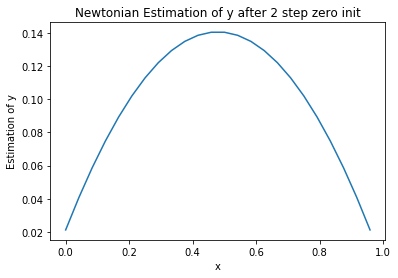

In [62]:
n = 24
h = 1/(n+1)
h2 = h*h
x = np.zeros([n,1])
s = np.zeros([n,1])
Jfx = np.zeros([n,n])
fx = np.zeros([n,1])

for k in range(0, 2):
    for i in range(0, n):

        if i == 0:
            fx[i][0] = ((x[i+1][0] + 0 - 2*x[i][0])/h2) + math.exp(x[i][0])
        elif i == n-1:
            fx[i][0] = ((x[i-1][0] + 0 - 2*x[i][0])/h2) + math.exp(x[i][0])
        else:
            fx[i][0] = ((x[i-1][0] + x[i+1][0] - 2*x[i][0])/h2) + math.exp(x[i][0])

        for j in range(0, n):
            if i == j:
                Jfx[i][j] = (-2.0/h2)+math.exp(x[i][0])
            elif i == j+1 or j ==i+1:
                Jfx[i][j] = (1.0/h2)

    s = np.linalg.solve(Jfx, (-1*fx))
    x = s+x

xlist = []
xlist.append(x)

plt.figure(3)
plt.plot(y, xlist[0])
plt.title('Newtonian Estimation of y after 2 step zero init')
plt.xlabel('x')
plt.ylabel('Estimation of y')
print(x)

[[0.0211599 ]
 [0.04068562]
 [0.05854502]
 [0.07470818]
 [0.08914762]
 [0.10183841]
 [0.1127584 ]
 [0.12188832]
 [0.12921194]
 [0.13471619]
 [0.13839117]
 [0.14023023]
 [0.14023012]
 [0.13839085]
 [0.13471574]
 [0.1292114 ]
 [0.12188771]
 [0.11275777]
 [0.10183782]
 [0.0891471 ]
 [0.07470778]
 [0.05854474]
 [0.04068545]
 [0.02115982]]


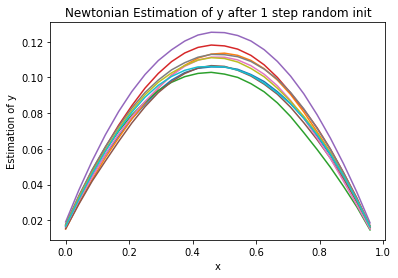

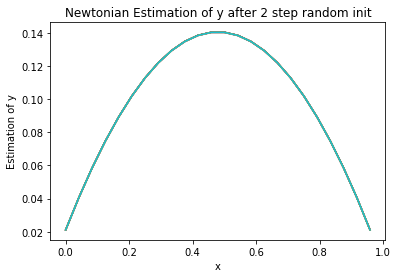

In [61]:
n = 24
h = 1/(n+1)
h2 = h*h
s = np.zeros([n,1])
Jfx = np.zeros([n,n])
fx = np.zeros([n,1])
y = np.arange(0,1, 1/24)
#print(y)

for z in range(0, 10):
    x = np.random.rand(n,1)
    for k in range(0, 1):
        for i in range(0, n):

            if i == 0:
                fx[i][0] = ((x[i+1][0] + 0 - 2*x[i][0])/h2) + math.exp(x[i][0])
            elif i == n-1:
                fx[i][0] = ((x[i-1][0] + 0 - 2*x[i][0])/h2) + math.exp(x[i][0])
            else:
                fx[i][0] = ((x[i-1][0] + x[i+1][0] - 2*x[i][0])/h2) + math.exp(x[i][0])

            for j in range(0, n):
                if i == j:
                    Jfx[i][j] = (-2.0/h2)+math.exp(x[i][0])
                elif i == j+1 or j ==i+1:
                    Jfx[i][j] = (1.0/h2)

        s = np.linalg.solve(Jfx, (-1*fx))
        x = s+x
    
    plt.figure(1)
    xlist.append(x)
    plt.plot(y, x)
    plt.title('Newtonian Estimation of y after 1 step random init')
    plt.xlabel('x')
    plt.ylabel('Estimation of y')
    
for z in range(0, 10):
    x = np.random.rand(n,1)
    for k in range(0, 2):
        for i in range(0, n):

            if i == 0:
                fx[i][0] = ((x[i+1][0] + 0 - 2*x[i][0])/h2) + math.exp(x[i][0])
            elif i == n-1:
                fx[i][0] = ((x[i-1][0] + 0 - 2*x[i][0])/h2) + math.exp(x[i][0])
            else:
                fx[i][0] = ((x[i-1][0] + x[i+1][0] - 2*x[i][0])/h2) + math.exp(x[i][0])

            for j in range(0, n):
                if i == j:
                    Jfx[i][j] = (-2.0/h2)+math.exp(x[i][0])
                elif i == j+1 or j ==i+1:
                    Jfx[i][j] = (1.0/h2)

        s = np.linalg.solve(Jfx, (-1*fx))
        x = s+x
    
    plt.figure(2)
    xlist.append(x)
    plt.plot(y, x)
    plt.title('Newtonian Estimation of y after 2 step random init')
    plt.xlabel('x')
    plt.ylabel('Estimation of y')
    
print(x)

The zero vector and the radom initialized vectors converges after 2 step almost as well as after 100 steps.  There is some slight difference but this dissapears after a few more steps thorugh newtonian integration. From the plots, it can be seen that the y is some kind of an inverse parabala. 